# Are the location of the pictures from The Planetary Archives correlated with their subject ?

**Author** : Lucile LAPRAY

**Date** : 01/25/2024

## 1. Introduction

"Fragment of reality, the same photograph could therefore provide information relating to ethnography, history, geography, etc., depending on the interests of those who viewed it." - *The Archives of the Planet: between documentary resource and story material* (2022), Valérie Perlès

Correlated with primitivism in arts and rejection of mondain society in social studies at the beginning of XXth century, documentary photographs from that time may reflect the photographer's view.

**Do the pictures taken in Africa within *The Archives of the Planet* collection demonstrate an interest for "primitivist" societies ?**

If it were the case, we should observe that :
- **Prediction 1 :** Africa-situated pictures portrays more people.
- **Prediction 2 :** The earlier the pictures were taken the more it showcases people.
- **Prediction 3 :** Pictures from Africa were taken earlier in the project.

## 2. Library import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import re

## 3. Data Import

In [2]:
df = pd.read_csv("archives-de-la-planete.csv", delimiter = ';')
pd.set_option('display.max_columns', None)
display(df)

,identifiant_fakir,numero_d_inventaire,legende_originale_titre,legende_revisee,lieu,date_de_prise_de_vue,operateur,mission_serie,lieu_actuel,themes,sujets,personnes,procede_technique,taille,appartenance_actuelle,collection,droits_cessibles,continent,region,pays,departement,ville,geo_point,photo_ftp,lieu_retraite,licence_reutilisation_1
0,IF90399,A 49 391,"Canada, Banff, Gorges de la Bow",NaN,"Banff, Canada",08/06/1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,Banff (Canada / Amérique),Nature / Environnement > Hydrographie,"Conifère, mont / montagne, Rivière",NaN,Autochrome,NaN,"Département des Hauts-de-Seine, musée Albert-Kahn",Archives de la Planète,NaN,Amérique,NaN,Canada,NaN,Banff,"51.1783629, -115.57076940000002",https://opendata.hauts-de-seine.fr/api/explore...,"Amérique, Canada, Banff",Librement réutilisable (CC-BY-4.0)
1,IF90407,A 49 399,"Canada, Banff, La Bow et le Mt Castle et la Sa...",NaN,"Banff, Canada",09/06/1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,Banff (Canada / Amérique),"Nature / Environnement > Hydrographie,Habitat ...","Conifère, mont / montagne, Rivière, Vallée",NaN,Autochrome,NaN,"Département des Hauts-de-Seine, musée Albert-Kahn",Archives de la Planète,NaN,Amérique,NaN,Canada,NaN,Banff,"51.1783629, -115.57076940000002",https://opendata.hauts-de-seine.fr/api/explore...,"Amérique, Canada, Banff",Librement réutilisable (CC-BY-4.0)
2,IF90409,A 49 401,"Canada, Banff, Le Mont Cascade et La Bow",NaN,"Banff, Canada",09/06/1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,Banff (Canada / Amérique),Nature / Environnement > Paysage,"Conifère, Forêt / bois, mont / montagne, Riv...",NaN,Autochrome,NaN,"Département des Hauts-de-Seine, musée Albert-Kahn",Archives de la Planète,NaN,Amérique,NaN,Canada,NaN,Banff,"51.1783629, -115.57076940000002",https://opendata.hauts-de-seine.fr/api/explore...,"Amérique, Canada, Banff",Librement réutilisable (CC-BY-4.0)
3,IF90411,A 49 403,"Canada, Banff, Vue vers les Inglismaltie et la...",NaN,"Banff, Canada",09/06/1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,Banff (Canada / Amérique),Nature / Environnement > Paysage,"Conifère, Forêt / bois, mont / montagne, Riv...",NaN,Autochrome,NaN,"Département des Hauts-de-Seine, musée Albert-Kahn",Archives de la Planète,NaN,Amérique,NaN,Canada,NaN,Banff,"51.1783629, -115.57076940000002",https://opendata.hauts-de-seine.fr/api/explore...,"Amérique, Canada, Banff",Librement réutilisable (CC-BY-4.0)
4,IF90431,A 49 422,"Canada, Banff, Bison de travers (petit)",NaN,"Banff, Canada",09/06/1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,Banff (Canada / Amérique),"Activite économique > Agriculture / élevage,An...","Clôture, mont / montagne, Vallée",NaN,Autochrome,NaN,"Département des Hauts-de-Seine, musée Albert-Kahn",Archives de la Planète,NaN,Amérique,NaN,Canada,NaN,Banff,"51.1783629, -115.57076940000002",https://opendata.hauts-de-seine.fr/api/explore...,"Amérique, Canada, Banff",Librement réutilisable (CC-BY-4.0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54993,IF8850,B 1 451 S,Azalées et Forêt bleue,Rhododendrons et azalées en fleurs au bord d'u...,"Propriété d'Albert Kahn, Boulogne, France",14/05/1930,Auguste Léon,NaN,Forêt bleue - marais (Boulogne propriété d'Alb...,"Habitat / Architecture > Parc / Jardin,Nature ...","Azalée / rhododendron, Cèdre de l'Atlas, Conif...",NaN,Autochrome,9 x 12 cm,"Département des Hauts-de-Seine, musée Albert-Kahn",Collection Jardin de Boulogne,NaN,Europe,NaN,France,Hauts-de-Seine,Boulogne-Billancourt,"48.842854, 2.227197",https://opendata.hauts-de-seine.fr/api/explore...,"Europe, France, Hauts-de-Seine, Boulogne-Billa...",Librement réutilisable (CC-00) - Domaine Public
54994,IF8852,B 1 453 S,Un pied d'Azalée,Azalées près de la forêt bleue,"Propriété d'Albert Kahn, Boulogne, France",14/05/1930,Auguste Léon,NaN,Forêt bleue - marais (Boulogn

Albert Khan, a philanthrope, creates the projet "the Archives of the Planet" in the shape of a collection of images, still or animated. Conducted between 1909 and 1931, the project includes monochromes collected between 1905 and 1937, and then some additions in 2004.

The Albert-Khan departmental museum preserves the Archives of the Planet, this set of images taken at the beginning of the XXth century, dedicated to document diversity of people and cultures.

Hence, the dataset used is the dataset of this collection, named « archives-de-la-planete », licenced by Hauts-de-Seine Department and the Albert Khan museum.

## 4. Data manipulation

In [3]:
# Manipulation des thèmes pour en avoir un compte des principaux
df['themes'] = df['themes'].str.strip()

# Initialiser un dictionnaire pour stocker les occurrences de chaque thème
themes_count = {}

for themes in df['themes']:
    # Ajouter une vérification pour les valeurs nulles (NaN)
    if pd.notna(themes):
        # Séparer les éléments par une virgule
        elements = themes.split(',')
        
        # Nettoyer chaque élément
        cleaned_elements = []
        for element in elements:
            # Supprimer le texte après le caractère '>'
            element = element.split('>')[0].strip()
            # Ajouter l'élément nettoyé à la liste
            cleaned_elements.append(element)
        
        # Compter les occurrences de chaque thème nettoyé
        for cleaned_element in cleaned_elements:
            if cleaned_element in themes_count:
                themes_count[cleaned_element] += 1
            else:
                themes_count[cleaned_element] = 1

# Convertir le dictionnaire en DataFrame
themes_count_df = pd.DataFrame(list(themes_count.items()), columns = ['Theme', 'Occurrences'])
themes_count_df_filtered = themes_count_df[themes_count_df['Occurrences'] >= 3000]


In [4]:
# Liste des thèmes filtrés
themes_filtered_list = themes_count_df_filtered['Theme'].tolist()

# Créer une expression régulière basée sur la liste des thèmes filtrés
pattern = r'\b(?:' + '|'.join(themes_filtered_list) + r')\b'

# Fonction pour extraire tous les thèmes qui répondent à la condition
def extract_matching_themes(themes):
    if pd.notna(themes):
        matches = re.findall(pattern, themes)
        return ', '.join(matches)
    else:
        return np.nan

# Ajouter la nouvelle colonne 'themes_filtered'
df['themes_filtered'] = df['themes'].apply(extract_matching_themes)
# Créer une nouvelle colonne 'themes_clean'
df['themes_clean'] = df['themes_filtered'].str.split(', ')

In [5]:
import re
import numpy as np

# Liste des thèmes filtrés
themes_filtered_list = themes_count_df_filtered['Theme'].tolist()

# Créer une expression régulière basée sur la liste des thèmes filtrés
pattern = r'\b(?:' + '|'.join(themes_filtered_list) + r')\b'

# Fonction pour extraire tous les thèmes qui répondent à la condition
def extract_matching_themes(themes):
    if pd.notna(themes):
        matches = re.findall(pattern, themes)
        if any(theme in matches for theme in ['Société', 'Etres humains', 'Religion', 'Personnalité', 'Vie quotidienne']):
            return 'Humains'
        else:
            return 'Autre'
    else:
        return np.nan

# Ajouter la nouvelle colonne 'themes_filtered'
df['themes_humans'] = df['themes'].apply(extract_matching_themes)

In [6]:
# Manipulation des dates pour ne conserver que les années
df['date_de_prise_de_vue'] = pd.to_datetime(df['date_de_prise_de_vue'], format = '%d/%m/%Y', errors = 'coerce')
df = df[df['date_de_prise_de_vue'].dt.year != 2004]

# Créer une nouvelle colonne avec l'année seulement
df['annee'] = df['date_de_prise_de_vue'].dt.to_period('Y')

## 5. Data Description

In [7]:
# Afficher les fréquences d'apparition des themes principaux
pd.set_option('display.max_rows', None)
display(themes_count_df)

,Theme,Occurrences
0,Nature / Environnement,19185
1,Habitat / Architecture,70345
2,Transport,4189
3,Activite économique,7856
4,Animal,1733
5,Société,3708
6,Etres humains,14467
7,Habillement,6016
8,Religion,10104
9,Personnalité,4901


In [8]:
land_frequencies = df['continent'].value_counts().reset_index()
land_frequencies.columns = ['continent', 'frequency']

#Afficher les fréquences d'apparition des continents
pd.set_option('display.max_rows', None)
display(land_frequencies)

,continent,frequency
0,Europe,42207
1,Asie,7620
2,Afrique,4324
3,Amérique,846


In [9]:
# Compter la fréquence d'apparition de chaque année
frequency_by_year = df['annee'].value_counts().sort_index()

all_years = pd.period_range(start = frequency_by_year.index.min(), end = frequency_by_year.index.max(), freq = 'Y')
all_years_df = pd.DataFrame(index = all_years)

# Fusionner le DataFrame des années avec le DataFrame de fréquence réelle
frequency_by_year = all_years_df.join(frequency_by_year, how = 'left').fillna(0)
print (frequency_by_year)


       count
1905   860.0
1906     0.0
1907     0.0
1908     0.0
1909   176.0
1910   526.0
1911   233.0
1912  1401.0
1913  2152.0
1914  1521.0
1915  1101.0
1916  1807.0
1917  2066.0
1918  2727.0
1919  3061.0
1920  4354.0
1921  3978.0
1922  4195.0
1923  2530.0
1924  3231.0
1925  1925.0
1926  2221.0
1927  2995.0
1928  1592.0
1929  2401.0
1930  2112.0
1931  1020.0
1932    15.0
1933    10.0
1934    46.0
1935     0.0
1936     0.0
1937     8.0


c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


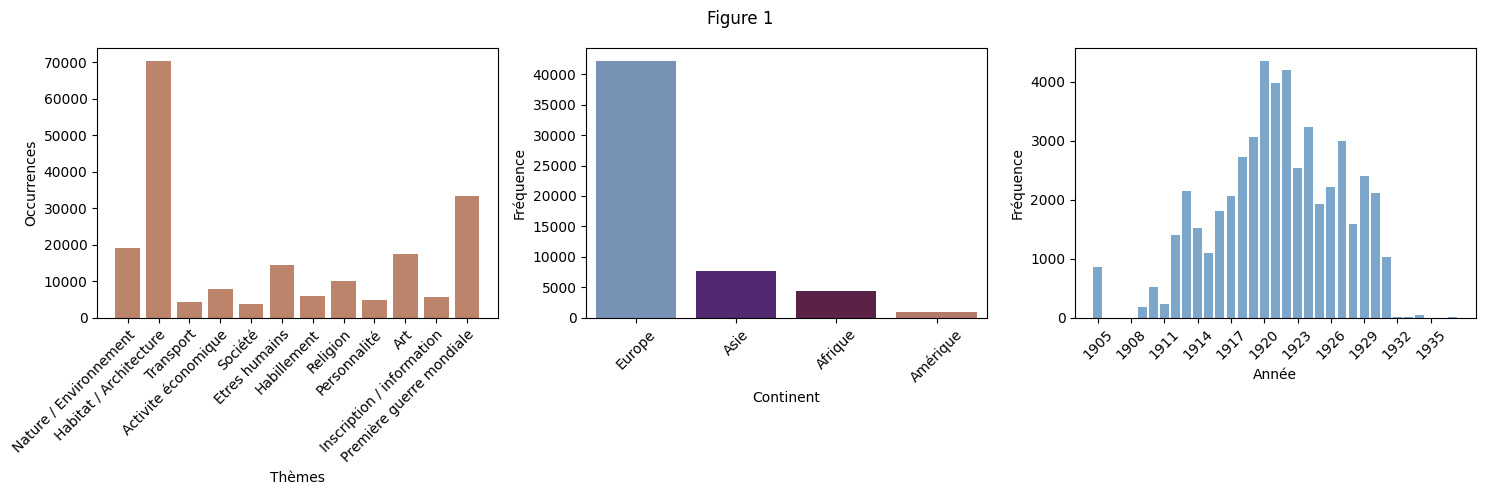

In [10]:
fig1 = plt.figure(figsize = (15, 5))
fig1.suptitle("Figure 1")


# Figure 1.a : Distribution of themes
comptes = np.arange(len(themes_count_df_filtered))
themes = themes_count_df_filtered['Theme']
occurrences = themes_count_df_filtered['Occurrences']


# Création du bar plot
plt.subplot(1, 3 ,1) 
plt.bar(comptes, occurrences, align = 'center', alpha = 0.7, color = 'sienna')
plt.xticks(comptes, themes, rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.xlabel('Thèmes')
plt.ylabel('Occurrences')

# Figure 1.b : Distribution locations
plt.subplot(1, 3, 2) 
sns.barplot(x = 'continent', y = 'frequency', data = land_frequencies, palette = 'twilight')
plt.xlabel('Continent')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)

# Figure 1.c : Distribution of dates
plt.subplot(1, 3, 3) 
plt.bar(frequency_by_year.index.astype(str), frequency_by_year['count'].values, color='steelblue', alpha=0.7)
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.xticks(range(0, len(frequency_by_year.index), 3), frequency_by_year.index[::3].astype(str))

plt.tight_layout()
plt.savefig('archives_planet_fig1.jpg')
plt.show()

c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


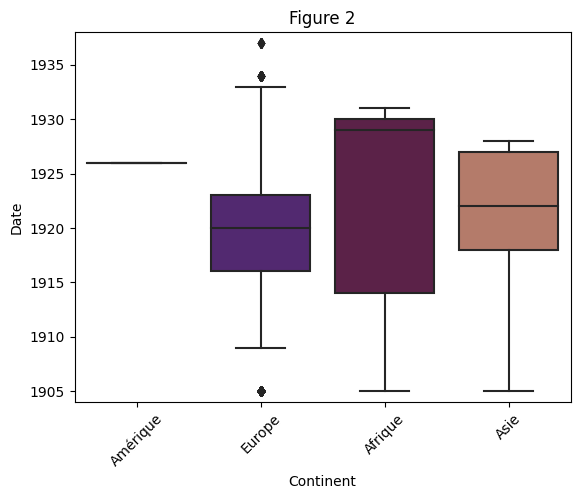

In [11]:
df['annee'] = df['annee'].dt.year
# Créer une nouvelle colonne 'continent_group' pour regrouper 'Afrique' et 'Autres continents'
df['continent_group'] = df['continent'].apply(lambda x: 'Afrique' if x == 'Afrique' else 'Autres continents')

plt.title('Figure 2')
sns.boxplot(x=df['continent'], y=df['annee'], palette='twilight')
plt.xlabel('Continent')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.ylim(1904, 1938)

plt.savefig('archives_planet_fig2.jpg')
plt.show()

## 6. Data Modelling

In [12]:
date_Afrique = df[df['continent'] == 'Afrique']['annee'].dropna()
date_other_continents = df[df['continent'].isin(['Amérique', 'Europe', 'Asie'])]['annee'].dropna()

# Effectuer le test t de Student
t_statistic, p_value = stats.ttest_ind(date_Afrique, date_other_continents, equal_var=False)

print(f"t-stat: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

t-stat: 22.8075
p-value: 0.0000


In [13]:
# Créer une nouvelle colonne 'continent_group' pour regrouper différencier l'Afrique et les autres continents
df['continent_group'] = df['continent'].apply(lambda x: 1 if x == 'Afrique' else 0)
df['presence_humains'] = df['themes_humans'].apply(lambda x: 1 if x == 'Humains' else 0)

y = df['presence_humains']
X = df[['continent_group','annee']]
X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651018
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       presence_humains   No. Observations:                54997
Model:                          Logit   Df Residuals:                    54994
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                0.006672
Time:                        21:33:00   Log-Likelihood:                -35804.
converged:                       True   LL-Null:                       -36045.
Covariance Type:            nonrobust   LLR p-value:                3.568e-105
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8845      0.032    -27.745      0.000      -0.947      -0.822
continent_grou

## 7. Results

Pictures from Africa were in general taken later in the project (see *Fig. 2*, $t = 22.8075$, $p_1 < 0.001$) which is really significant but doesn't explain the variation. 
Moreover, there is a slightly relevant difference of theme, portraying people or not, depending on the location and the date of the pictures ($\beta_1 = 0.6203$ and $\beta_2 = 0.0002$) which is significant for both, but different from the null hypothesis for the location, that's to say Africa, and completely unimportant when it comes to the date. It also doesn't seem to variate much ($p_2 < 0.001$, $p_2 < 0.001$, $R^2 = 0.006672$).

With those result, it seems necessary for a better understanding to complete the analysis with the representations of the distribution of themes (with people or not) in terms of years (see *Fig. 3*), as well as the representations of the distribution of themes (with people or not) per continent (see *Fig. 4*)

## 8. Complementary representations

c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lucil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

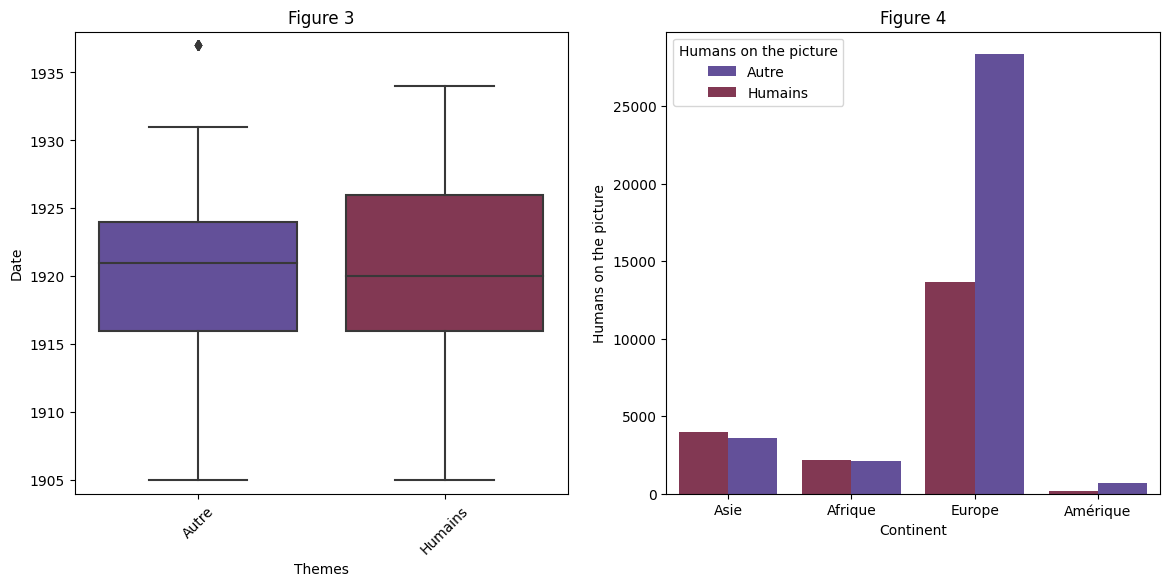

In [14]:
fig3 = plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1) 
plt.title('Figure 3')
sns.boxplot(x=df['themes_humans'], y=df['annee'], palette='twilight')
plt.xlabel('Themes')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.ylim(1904, 1938)

plt.subplot(1, 2, 2) 
plt.title('Figure 4')
sns.countplot(x='continent', hue='themes_humans', data=df, order=df['continent'].unique(), palette = 'twilight')
plt.gca().invert_xaxis()
plt.xlabel('Continent')
plt.ylabel('Humans on the picture')
plt.legend(title='Humans on the picture')

plt.savefig('archives_planet_fig3_4.jpg')
plt.show()

## 9. Conculsion

It appears Prediction 3 was wrong, as we saw that Africa-situated pictures were taken later on during the project. 
Then, Prediction 1 + Prediction 2, which were that there would be more pictures whose subject would be human beings when the pictures were taken in Africa and at the beginning of the project, turned out to be unsignificant and irrelevant. 

Indeed, there isn't much difference of theme (concerning human presence on the picture at least) depending on the year it was taken on, even compared to other themes. Moreover, the difference of themes depeding on the continent seems less obivous when looked within the continent (presence or not of humans on the pictures) and when looked at the separation 'Africa' or 'other continent', but the problem is raised when the proportion of pictures with human beings and without in Europe is compared to ones of Africa or Asia.